# Polynomial Regression

We use Polynomial Regression when we have non-linear relationship in the data

where we just can't have a best fit line

So, we start adding degrees (power) in the independent variable

### Let's create data which have non-linear relationship

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.rand(100, 1)

# y = 0.5x^2 + 1.5x + 2 + outliers

- np.random.rand(100, 1) generates 100 random values between 0 and 1 (uniformly distributed) and shapes them into a column vector of size (100, 1).
- Multiplying by 6 expands the range of these random numbers to between 0 and 6.
- Subtracting 3 shifts the range to between -3 and 3.
- So, X is a (100, 1) array of random values uniformly distributed between -3 and 3.

## For y, we have
- This is creating the target variable y based on a quadratic equation.
- 0.5 * X ** 2: The squared term, introducing a quadratic component to the relationship.
- 1.5 * X: The linear component.
- (+) 2: The intercept or constant term.
- (+) np.random.rand(100, 1): Adds a bit of random noise to y, creating a more realistic dataset where the relationship is not perfectly clean.

## Plotting will make sense

In [31]:
%matplotlib inline

Text(0, 0.5, 'Y Dataset')

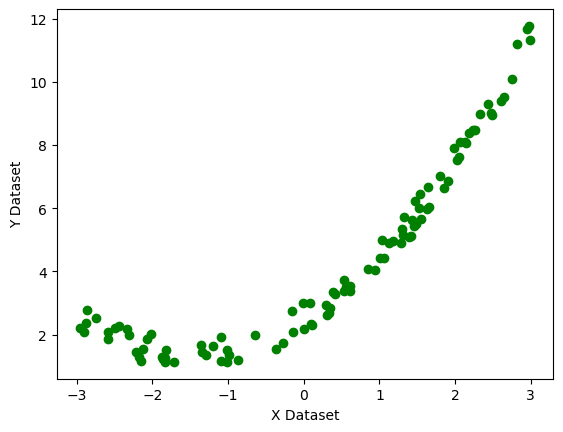

In [32]:
plt.scatter(X, y, color = 'g')
plt.xlabel('X Dataset')
plt.ylabel('Y Dataset')

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Apply SImple Linear Regression FIrst

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
regression_l = LinearRegression()

In [37]:
regression_l.fit(X_train, y_train)

LinearRegression()

In [38]:
from sklearn.metrics import r2_score
score = r2_score(y_test, regression_l.predict(X_test))
score

0.7346505812423447

## Let's visualize our 'naive' model

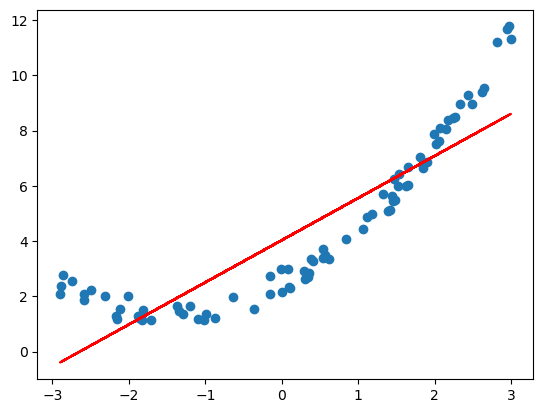

In [40]:
plt.plot(X_train, regression_l.predict(X_train), color = 'r')
plt.scatter(X_train, y_train)

### Let's apply polynomial transformation

In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [42]:
poly = PolynomialFeatures( degree = 2 , include_bias = True)

When include_bias=False is Better:
When you know the data passes through the origin: If you're certain that your target variable is zero when all features are zero (i.e., there's no need for an intercept), you can set include_bias=False. For example, in physics or engineering models, certain relationships are known to pass through the origin.
Example: If you're modeling a physical phenomenon where zero input must result in zero output (like velocity and force), setting include_bias=False may be more appropriate.

In [43]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [52]:
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)

score = r2_score(y_test, y_pred)
score
print(regression.coef_, regression.intercept_)

[[0.         1.50223367 0.52200607]] [2.41835497]


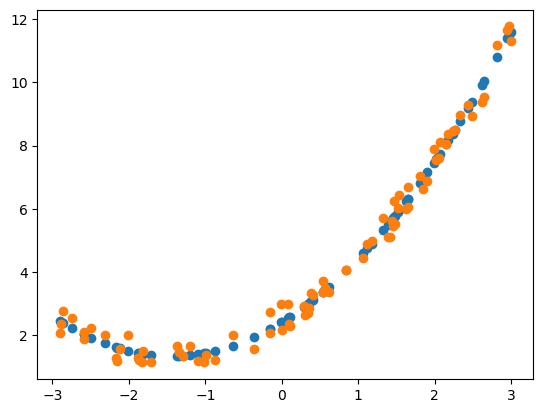

In [56]:
plt.scatter(X_train, regression.predict(X_train_poly))
plt.scatter(X_train, y_train)

In [57]:
#Prediction of new data
X_new = np.linspace(-3, 3, 200).reshape(200,1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

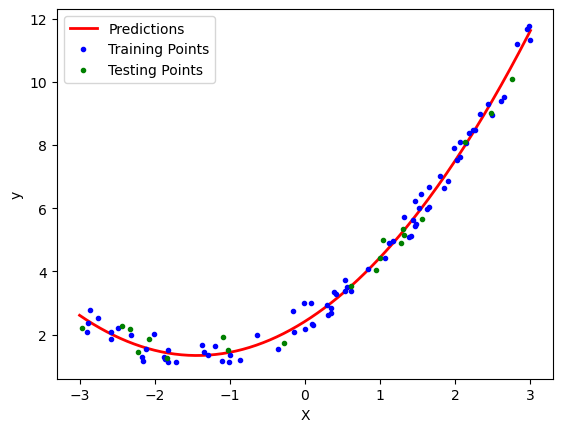

In [60]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, 'r-', linewidth = 2, label = "Predictions")
plt.plot(X_train, y_train, 'b.', label =  "Training Points")

plt.plot(X_test, y_test, 'g.', label = 'Testing Points')
plt.xlabel('X')
plt.ylabel('y')

plt.legend()
plt.show()